In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Collection and Preprocessing

In [3]:
#loading the csv data into a Panda DataFrame
df=pd.read_csv("heart.csv")

In [4]:
#print first 5 rows of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#print last 5 rows of dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#number of rows and columns in dataset
df.shape

(1025, 14)

In [7]:
#Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#Checking for missing value in data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#statistical measures of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Splitting the Features and Target

In [10]:
#Checking the distribution  of
Y=df["target"]
X=df.drop("target",axis=1)


In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


### Spliting the data into Training data and Test data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10) 

In [14]:
print(X.shape,x_train.shape,x_test.shape)

(1025, 13) (717, 13) (308, 13)


In [15]:
#Normalizing the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Model Training

### Logistic Regression

In [16]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
model_predict=model.predict(x_test)


In [55]:
#accuracy on test data
lr_acc_score=accuracy_score(y_test,model_predict)

In [18]:
#confusion Matrix
confusion_matrix(y_test,model_predict)  

array([[124,  29],
       [ 14, 141]], dtype=int64)

### Decision Tree

In [47]:
model_dt=DecisionTreeClassifier(random_state=1,max_depth=3)
model_dt.fit(x_train,y_train)
model_dt_predict=model_dt.predict(x_test)

In [56]:
dt_acc_score=accuracy_score(y_test,model_dt_predict)

In [49]:
confusion_matrix(y_test,model_dt_predict)

array([[118,  35],
       [ 21, 134]], dtype=int64)

### Random Forest

In [52]:
rf=RandomForestClassifier(max_depth=3,random_state=1)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)

In [58]:
rf_acc_score=accuracy_score(y_test,rf_predict)

In [54]:
confusion_matrix(y_test,rf_predict) 

array([[128,  25],
       [ 14, 141]], dtype=int64)

In [59]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.038961
1,Random Forest,87.337662
2,Decision Tree,81.818182


<BarContainer object of 3 artists>

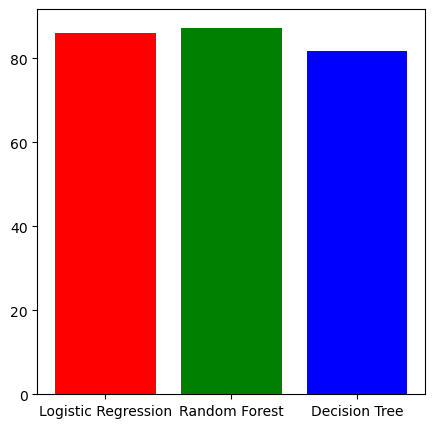

In [66]:
colors=['red','green','blue']
plt.figure(figsize=(5,5))
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)